  0%|          | 0/50 [00:00<?, ?it/s]

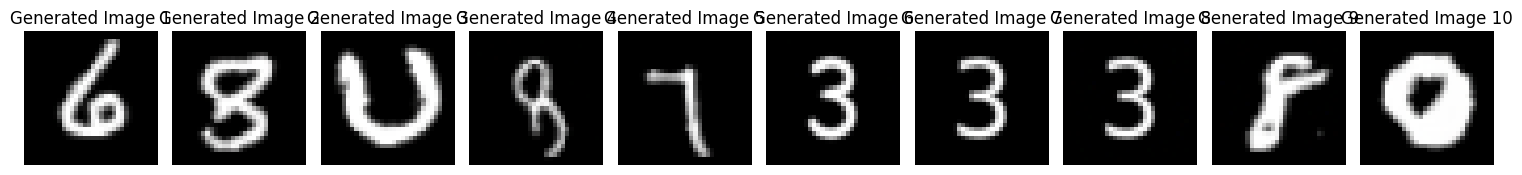

In [7]:
import torch
from diffusers import DDPMPipeline, UNet2DModel
from scheduling_rectflow import RectFlowScheduler
import matplotlib.pyplot as plt
import os

# Fix for randn_tensor incompatibility
def fixed_randn_tensor(shape, generator=None, device=None, dtype=None):
    """
    Generates a tensor of random values with the specified shape, generator, device, and dtype.
    This function is adjusted for compatibility with the current PyTorch version.
    """
    rand_device = device or "cpu"
    return torch.randn(shape, generator=generator, device=rand_device, dtype=dtype)

# Replace the function in Diffusers with the fixed version
from diffusers.utils import torch_utils
torch_utils.randn_tensor = fixed_randn_tensor

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the trained model and scheduler
model_dir = "./output/test3"
unet = UNet2DModel.from_pretrained(f"{model_dir}/unet")
scheduler_config_path = os.path.join(model_dir, "scheduler", "scheduler_config.json")
noise_scheduler = RectFlowScheduler.from_config(scheduler_config_path)
unet.to(device)

# Create the pipeline
pipeline = DDPMPipeline(
    unet=unet,
    scheduler=noise_scheduler,
)

# Set the number of inference steps
num_inference_steps = 50  # Adjust as needed for quality vs. speed
pipeline.scheduler.set_timesteps(num_inference_steps)

# Generate random noise
batch_size = 10  # Number of images to generate
image_size = 32  # Size of the generated images
noise = torch.randn((batch_size, 3, image_size, image_size), device=device)  # RGB noise (3 channels)

# Run the reverse diffusion process
generated_images = pipeline(batch_size=batch_size, generator=None, num_inference_steps=num_inference_steps).images

# Visualize the generated images
fig, axes = plt.subplots(1, batch_size, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i])
    ax.axis("off")
    ax.set_title(f"Generated Image {i+1}")
plt.tight_layout()
plt.show()


In [ ]:
"""""
python train_unconditional.py \
    --train_data_dir "./data/datasets/mnist_digits/train" \
    --output_dir "./output/test3" \
    --resolution 32 \
    --train_batch_size 16 \
    --num_epochs 15 \
    --learning_rate 1e-4 \
    --ddpm_num_steps 1000 \
    --ddpm_beta_schedule "linear" \
    --mixed_precision no \
    --gradient_accumulation_steps 1 \
    --printed_digits_dir "./data/converted_digits" \
    --replacement_prob 0.3 \
    --save_images_epochs 5 \
    --save_model_epochs 5 \
    --overwrite_output_dir
"""""

'""\npython train_unconditional.py     --train_data_dir "./data/datasets/mnist_digits/train"     --output_dir "./output/test1"     --resolution 64     --train_batch_size 16     --num_epochs 50     --learning_rate 1e-4     --ddpm_num_steps 1000     --ddpm_beta_schedule "linear"     --mixed_precision no     --gradient_accumulation_steps 1     --printed_digits_dir "./converted_digits"     --replacement_prob 0.3     --save_images_epochs 5     --save_model_epochs 5     --overwrite_output_dir\n'